In [1]:
import numpy as np
import pyemma
import matplotlib.pyplot as plt
import glob

In [6]:
%matplotlib inline

In [2]:
feat0dir = "../amber-gpu/pyemma-civsd-feat1-msmb-100ns-1st/TRANSFORMED_0"
files = sorted(glob.glob(f"{feat0dir}/*"))
len(files)

3000

In [3]:
files[0]

'../amber-gpu/pyemma-civsd-feat1-msmb-100ns-1st/TRANSFORMED_0/00000000.npy'

In [4]:
feat = np.load(files[0])
feat.shape

(1000, 2590)

In [5]:
print(feat[0][0])

4.157569


In [ ]:
feat_data = np.zeros()
for file in files:
    feat = np.load(file)

In [18]:
feat1dir = "../amber-gpu/pyemma-civsd-feat1-msmb-100ns-1st/TRANSFORMED_0_1/"
files2 = sorted(glob.glob(f"{feat1dir}*"))
print(len(files2))
feat2 = np.load(files2[0])
print(feat2.shape)

3000
(1000, 2590)


In [19]:
print(feat2[0, 0])

1.1945859


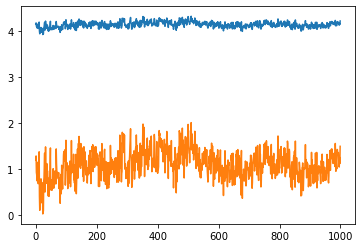

In [21]:
plt.plot(feat[:, 0])
plt.plot(feat2[:, 0])

In [22]:
np.mean(feat[:, 0])

4.139892

In [6]:
import sys

sys.path.insert(1, "/project2/dinner/DGA_Spencer/")
import DGA

# Check sampling
2.9.2021

## Load all CV trajectories 

AMBER trajectories

In [8]:
cv_files_amber = sorted(
    glob.glob("../amber-gpu/msm-projection-300ns/TRANSFORM_2D_npy/*")
)
print(len(cv_files_amber))

1000


In [9]:
data0 = np.load(cv_files_amber[0])
print(data0.shape)

(3000, 2)


In [10]:
cv_trajs = np.empty((1000, 3000, 2))

for i, file in enumerate(cv_files_amber):
    data = np.load(file)
    cv_trajs[i, :, :] = data

print(cv_trajs.shape)

(1000, 3000, 2)


In [12]:
np.savez("../store/cv_dist_spin.npz", cv_trajs)

Load saved file

In [2]:
cv_trajs = np.load("../store/cv_dist_spin.npz")

Anton trajectories? should redo since some incomplete

In [17]:
cv_files_anton = sorted(
    glob.glob("../amber-gpu/msm-projection-1000ns/TRANSFORM_2D_txt/*")
)
print(cv_files_anton[-10:])
print(len(cv_files_anton))

['../amber-gpu/msm-projection-1000ns/TRANSFORM_2D_txt/civsd-90.txt', '../amber-gpu/msm-projection-1000ns/TRANSFORM_2D_txt/civsd-91.txt', '../amber-gpu/msm-projection-1000ns/TRANSFORM_2D_txt/civsd-92.txt', '../amber-gpu/msm-projection-1000ns/TRANSFORM_2D_txt/civsd-93.txt', '../amber-gpu/msm-projection-1000ns/TRANSFORM_2D_txt/civsd-94.txt', '../amber-gpu/msm-projection-1000ns/TRANSFORM_2D_txt/civsd-95.txt', '../amber-gpu/msm-projection-1000ns/TRANSFORM_2D_txt/civsd-96.txt', '../amber-gpu/msm-projection-1000ns/TRANSFORM_2D_txt/civsd-97.txt', '../amber-gpu/msm-projection-1000ns/TRANSFORM_2D_txt/civsd-98.txt', '../amber-gpu/msm-projection-1000ns/TRANSFORM_2D_txt/civsd-99.txt']
243


In [18]:
## TODO: calculate

## Plots

In [3]:
cv_arr = np.vstack(cv_trajs)
cv_arr.shape

(1, 1)

Distribution of sampling

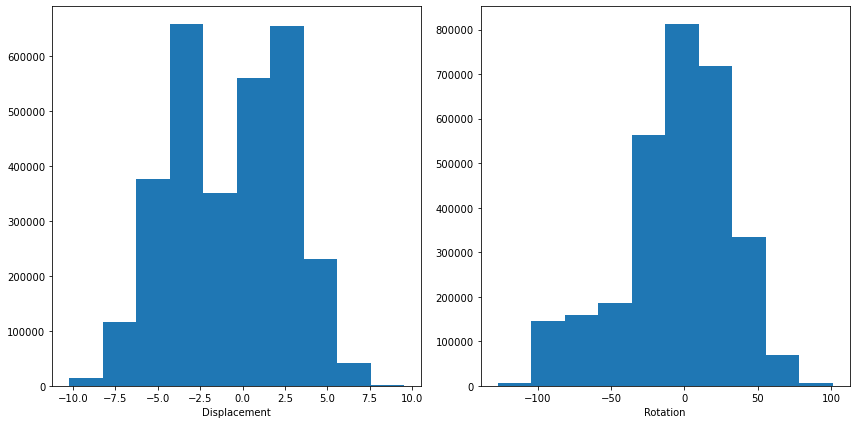

In [24]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
ax0.hist(cv_arr[:, 0])
ax1.hist(cv_arr[:, 1])
ax0.set(xlabel="Displacement")
ax1.set(xlabel="Rotation")
f.tight_layout()

In [25]:
print(f"Average displacement: {np.mean(cv_arr[:,0])} +/- {np.std(cv_arr[:,0])}")
print(f"Average rotation:     {np.mean(cv_arr[:,1])} +/- {np.std(cv_arr[:,1])}")

Average displacement: -0.7511828723333338 +/- 3.3652933767554423
Average rotation:     -5.552801112666669 +/- 36.18260066948028


Sampling in displacement/rotation CV space

(-150.0, 100.0)

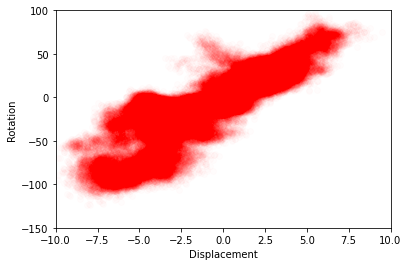

In [36]:
disp_arr = cv_arr[::20, 0]
rot_arr = cv_arr[::20, 1]
f, ax = plt.subplots()
ax.scatter(disp_arr, rot_arr, alpha=0.01, color="r")
ax.set(xlabel="Displacement", ylabel="Rotation")
ax.set_xlim([-10, 10])
ax.set_ylim([-150, 100])

May be interesting to compare this to the REMD/US PMF, which shows different features as Rong mentioned

### Plot some CVs of trajectories to identify conformational changes

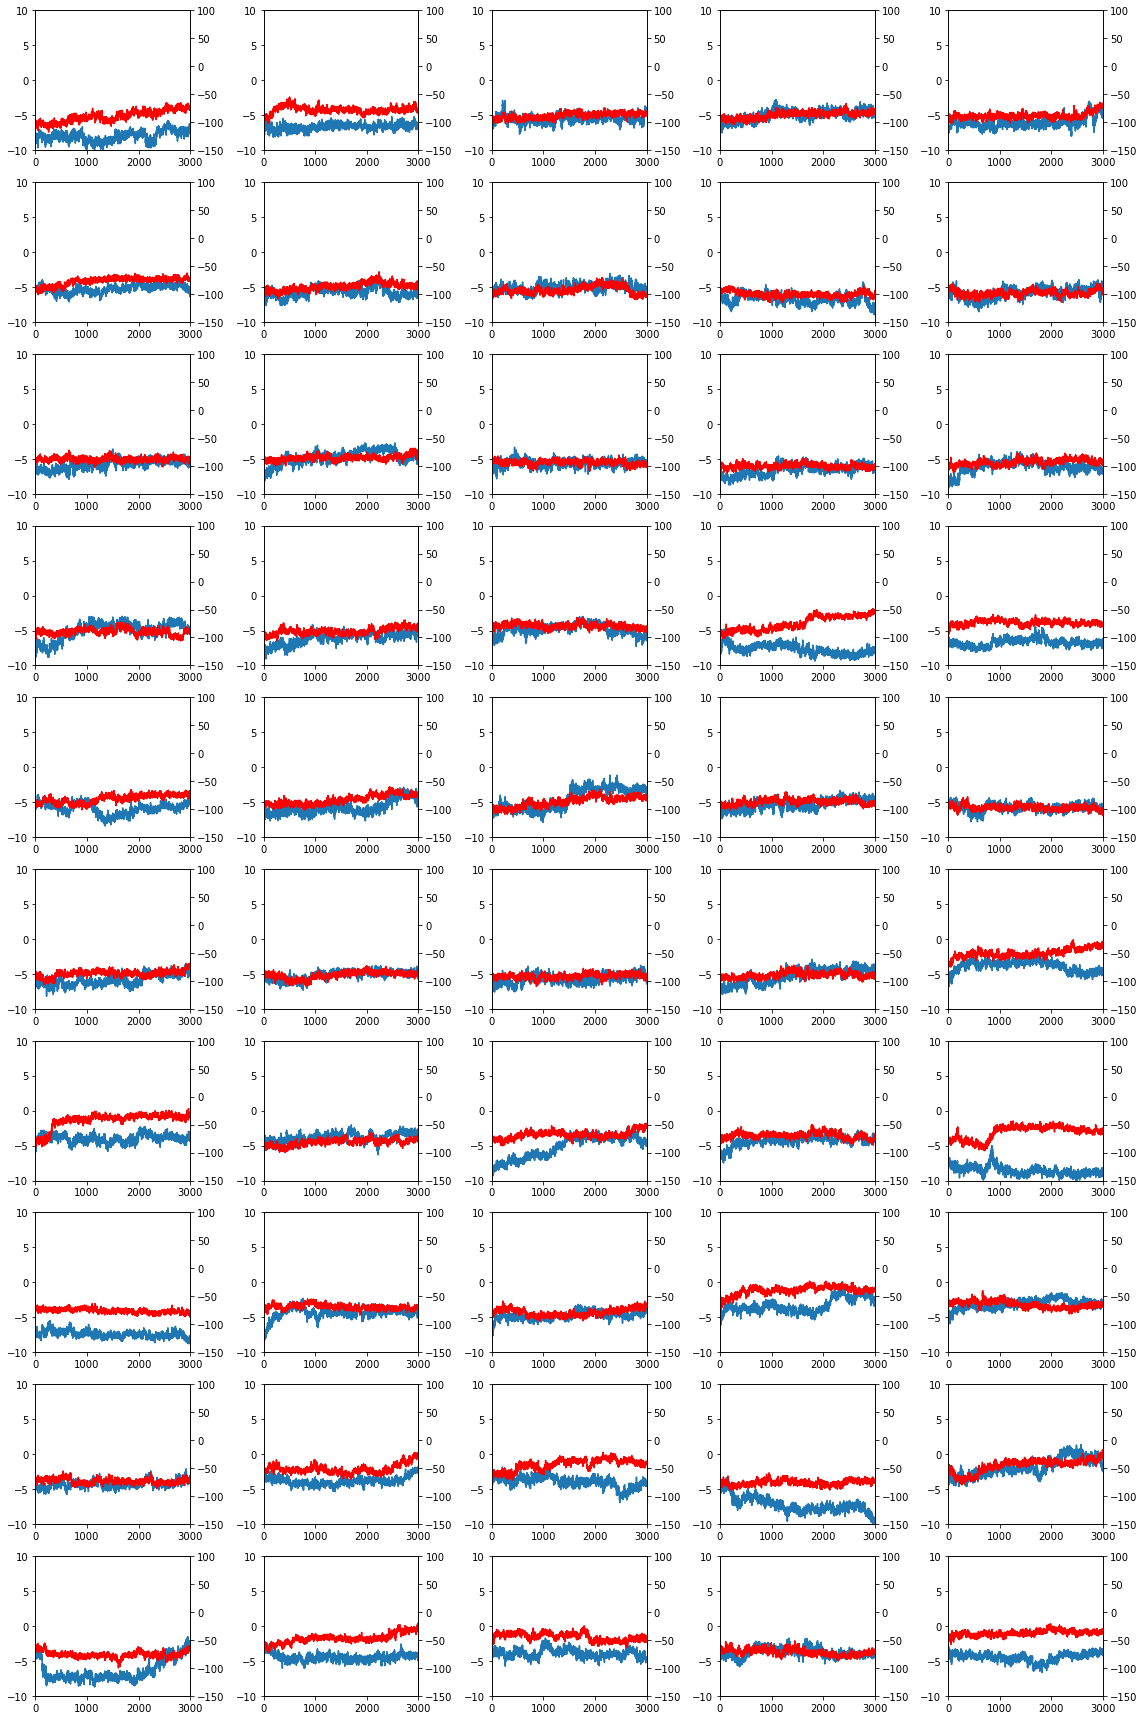

In [45]:
f, axs = plt.subplots(10, 5, figsize=(16, 24))
for i, ax in enumerate(axs.flat):
    ax.plot(cv_trajs[i, :, 0])
    ax2 = ax.twinx()
    ax2.plot(cv_trajs[i, :, 1], color="r")
    ax.set_xlim([0, 3000])
    ax.set_ylim([-10, 10])
    ax2.set_ylim([-150, 100])

f.tight_layout()

# Note: red is rotation and blue is displacement

Visualized trajectories and notes:
No. 30: small rotation, maybe some changing of the salt bridge (movement around 300 frames in))
34: 

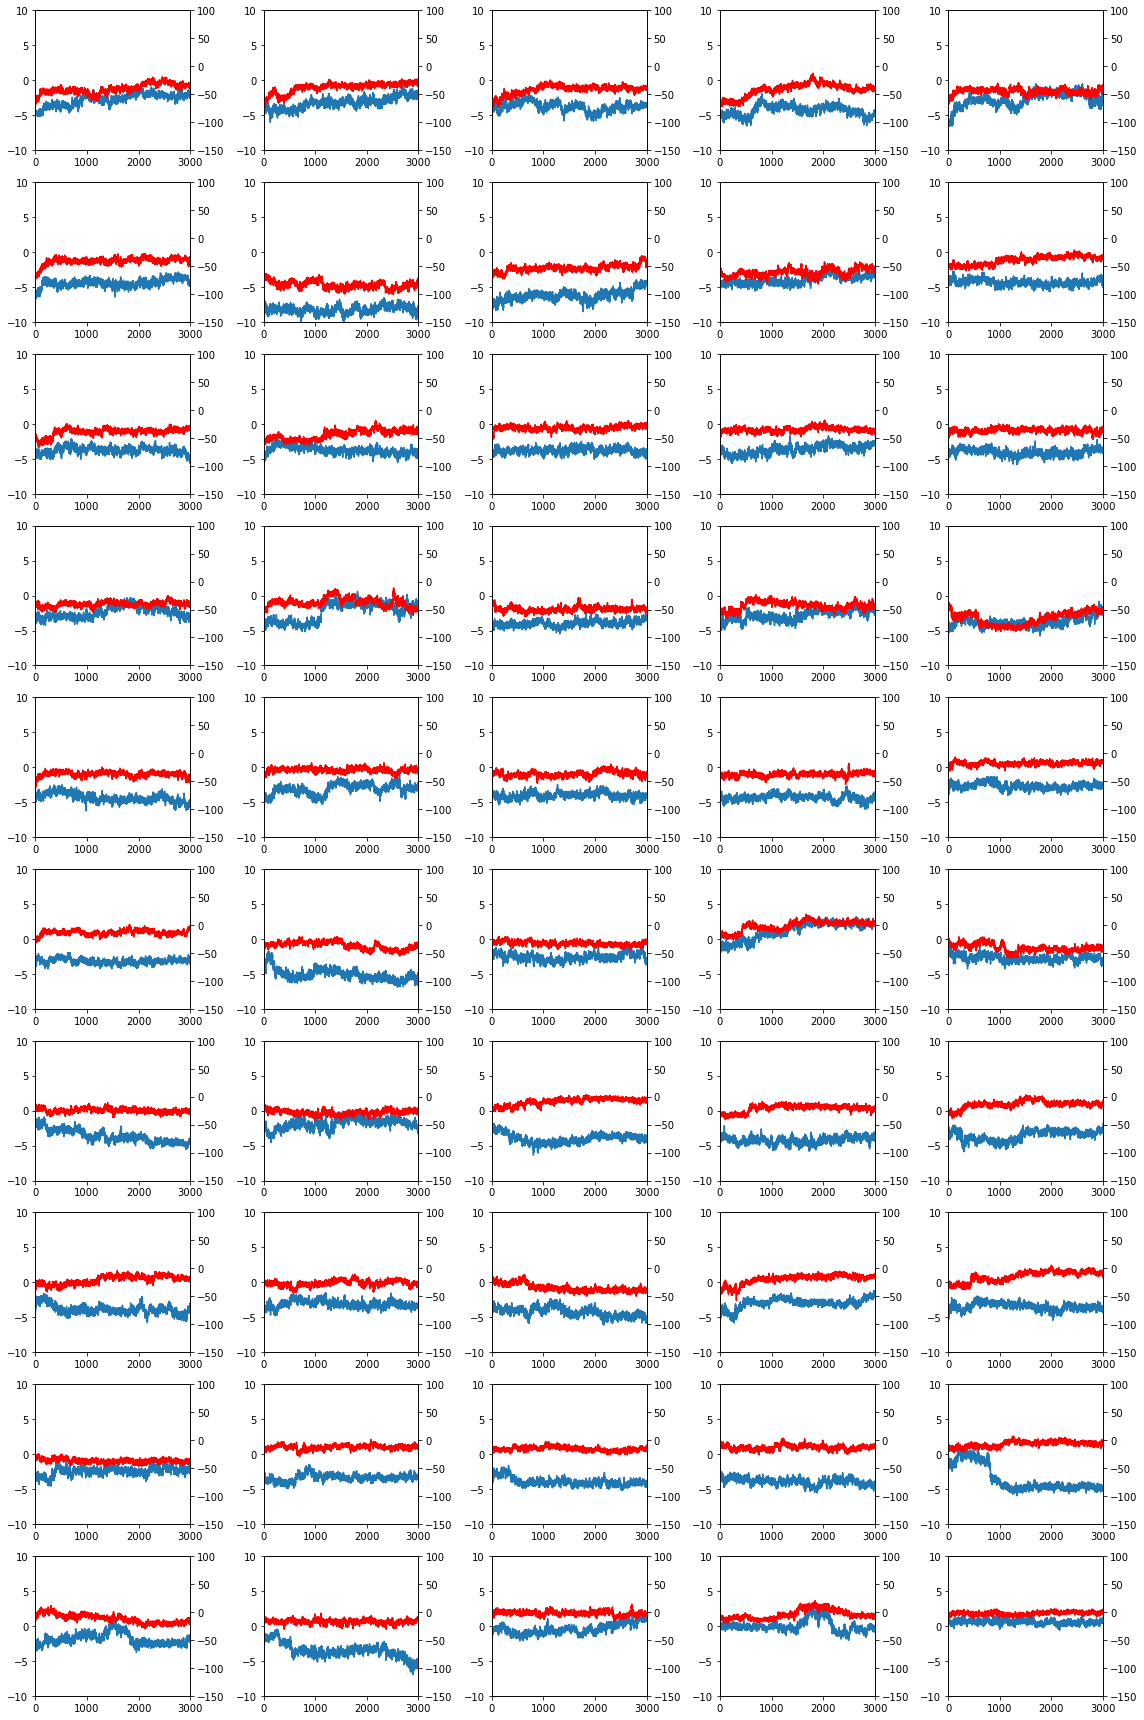

In [46]:
# trajectories 50 - 99
f, axs = plt.subplots(10, 5, figsize=(16, 24))
for i, ax in enumerate(axs.flat):
    ax.plot(cv_trajs[i + 50, :, 0])
    ax2 = ax.twinx()
    ax2.plot(cv_trajs[i + 50, :, 1], color="r")
    ax.set_xlim([0, 3000])
    ax.set_ylim([-10, 10])
    ax2.set_ylim([-150, 100])

f.tight_layout()

# Note: red is rotation and blue is displacement

## Load salt bridge features to use as CVs
2.10.21

In [5]:
feat3_files = sorted(
    glob.glob("../amber-gpu/pyemma-civsd-feat3-msmb-combined/TRANSFORMED_0/*")
)
len(feat3_files)

945

Load all AMBER trajectories with feat3
60 features, 30 (6 arginines CA times 5 aspartate CA, and then for ARG Cz to ASP Cg)

In [7]:
feat = pyemma.coordinates.featurizer("../civsd-pro.pdb")
pair_indices = np.loadtxt("../store/feat3_atom_indices.txt", dtype=np.int32)
feat.add_distances(pair_indices)

In [8]:
feat.dimension()

60

In [9]:
xtc_files = sorted(glob.glob("../data/xtc300ns/*"))
print(f"Number of xtc files: {len(xtc_files)}")
feat3_raw = pyemma.coordinates.load(xtc_files, features=feat, chunksize=32)

Number of xtc files: 1000


In [36]:
print(np.asarray(feat3_raw).shape)
np.savez_compressed("../store/feat3_raw_amber", feat3_raw)

(1000, 3000, 60)


In [34]:
xtc_files_anton = sorted(glob.glob("../anton/xtc1000ns/*"))
print(f"Number of xtc files: {len(xtc_files_anton)}")
feat3_raw_2 = pyemma.coordinates.load(xtc_files_anton, features=feat, chunksize=32)

Number of xtc files: 295


In [47]:
feat3_raw_2[].shape

(10000, 60)

In [48]:
feat3_raw_anton = np.empty((295, 10000, 60))
for i, traj in enumerate(feat3_raw_2):
    print(traj.shape)

(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(10000, 60)
(100

In [49]:
feat_raw_anton = feat3_raw_2[0]
for i, traj in enumerate(feat3_raw_2):
    feat_raw_anton = np.concatenate((feat_raw_anton, traj))

In [50]:
feat_raw_anton.shape

(3590000, 60)

In [51]:
np.savez_compressed("../store/feat3_raw_anton.npz", feat_raw_anton[10000:])

### Calculate average distances between each Arg and the Asp
Arginines: residues 217, 223, 226, 229, 232 (5 residues)

Negative: 129 (D), 136 (D), 151 (D), 164 (D), 183 (E), 186 (D) (6 residues)

## Load Anton trajectories with dist/rot CVs

In [53]:
cv_files_anton = sorted(
    glob.glob("../amber-gpu/msm-projection-1000ns/TRANSFORM_2D_txt/*")
)
print(len(cv_files_anton))

243


In [57]:
cv_trajs_anton = np.empty((243, 10000, 2))

for i, file in enumerate(cv_files_anton):
    print(i)
    data = np.loadtxt(file)
    cv_trajs_anton[i, :, :] = data

print(cv_trajs_anton.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


ValueError: Wrong number of columns at line 6055